In [1]:
# basic imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import misc, ndimage
import keras
from keras import backend as K
import os

Using TensorFlow backend.


In [2]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [4]:
# define plotting method
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

C:\Users\shuaix\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


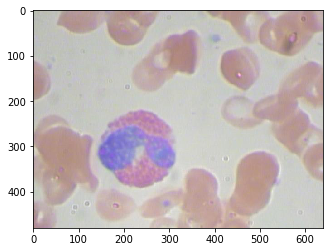

In [6]:
# using a neutrophil as example to plot
image_path = 'wbc_sample.jpg'
image = np.expand_dims(ndimage.imread(image_path),0)
plt.imshow(image[0])
plt.show()

# Augmentation Test

## Ways of augmentation

1. Rotation: randomly rotate pictures within the range set with rotation_range
2. Shifting: randomly shift pictures vertically or horizontally within the range set with width_shift and height_shift
3. Rescale: original images consist in RGB coefficients in 0-255, we rescale with a 1/255
4. Shear: randomly apply shearing transformations
5. Zoom: randomly zoom inside pictures
6. Flip: randomly flip half of the images horizontally, assuming there are no horizontal assymetry
7. fill: fill pixels generated by rotation or shifting

## Rotation

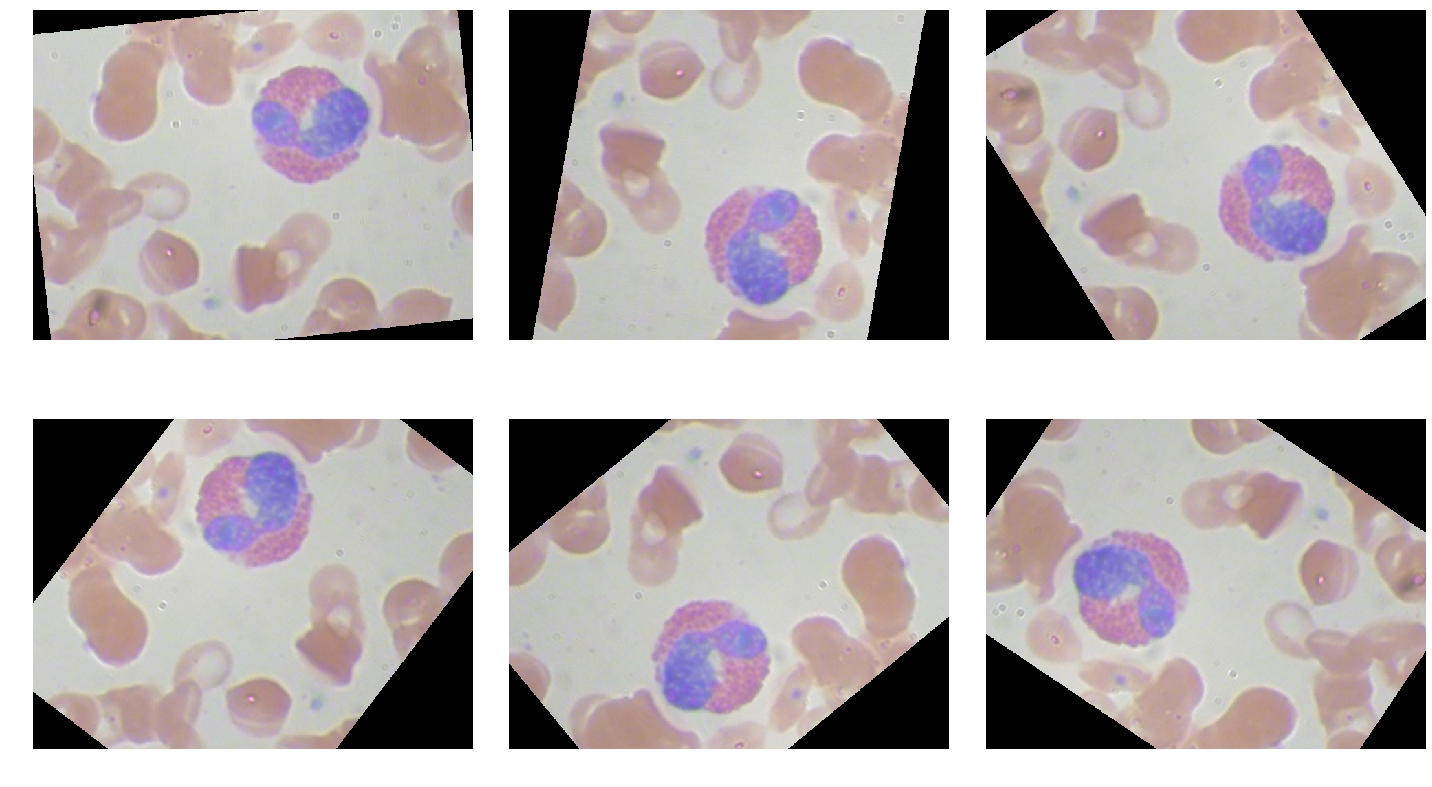

In [9]:
# rotation
gen = ImageDataGenerator(rotation_range=180,fill_mode = 'constant')
aimg = gen.flow(image,batch_size = 1)
aug_images = [next(aimg)[0].astype(np.uint8) for i in range(6)]
plots(aug_images, figsize=(20,12), rows=2)
plt.xlabel('rotation')
plt.tight_layout()
plt.show()

## Shifting

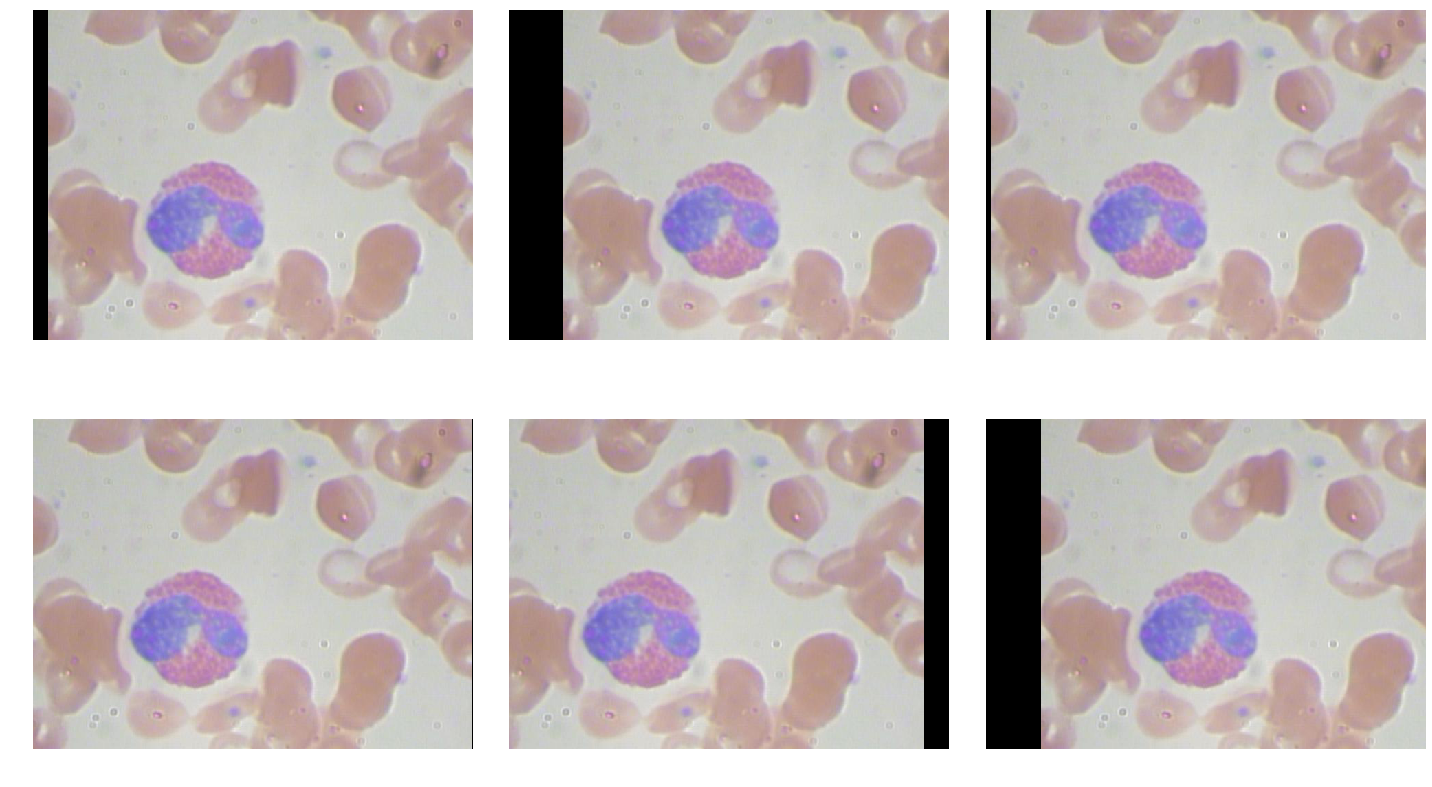

In [11]:
# shifting horizontally
gen = ImageDataGenerator(width_shift_range=0.15,fill_mode = 'constant')
aimg = gen.flow(image,batch_size = 1)
aug_images = [next(aimg)[0].astype(np.uint8) for i in range(6)]
plots(aug_images, figsize=(20,12), rows=2)
plt.xlabel('Width Shift Range')
plt.tight_layout()
plt.show()

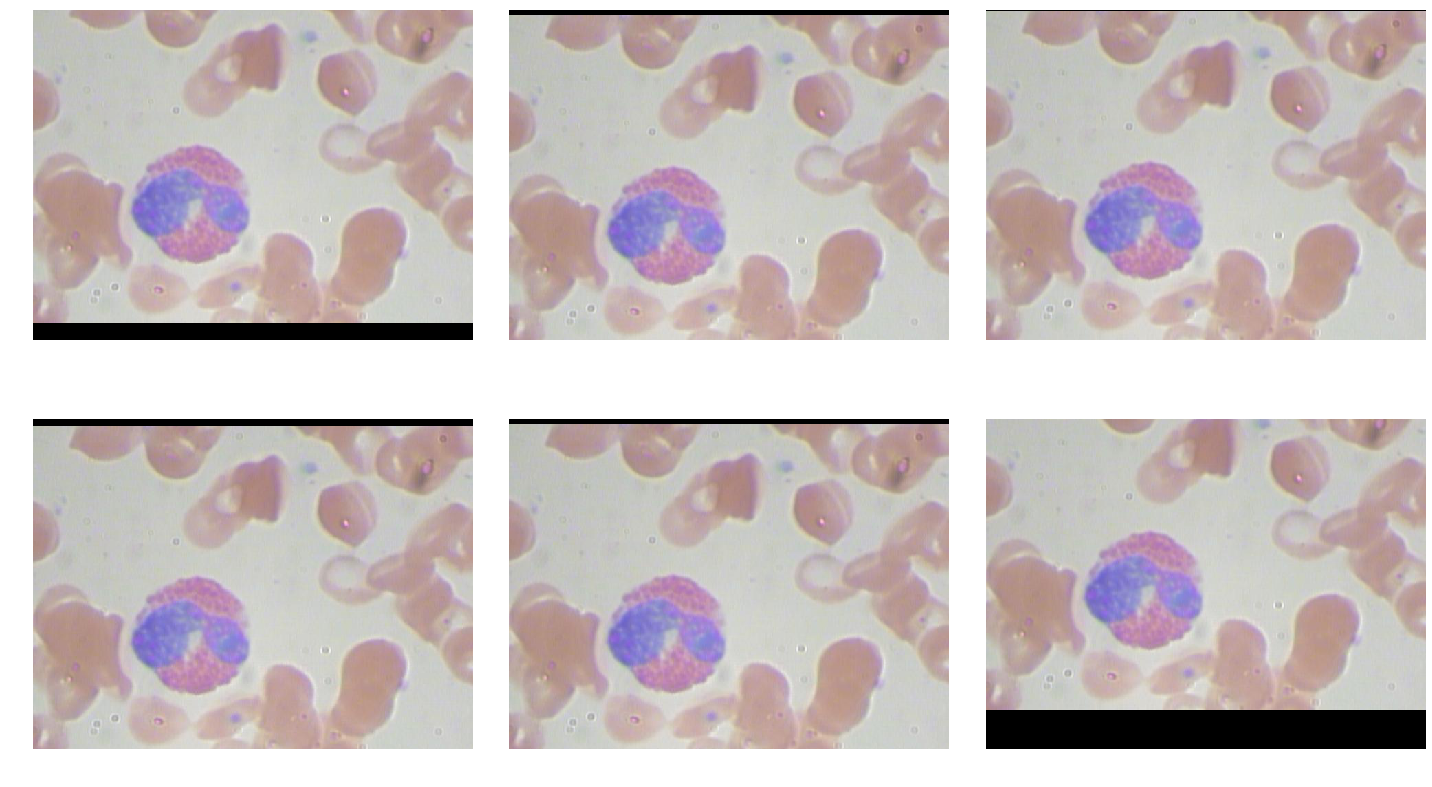

In [12]:
# shifting vertically
gen = ImageDataGenerator(height_shift_range=0.15,fill_mode = 'constant')
aimg = gen.flow(image,batch_size = 1)
aug_images = [next(aimg)[0].astype(np.uint8) for i in range(6)]
plots(aug_images, figsize=(20,12), rows=2)
plt.xlabel('Height Shift Range')
plt.tight_layout()
plt.show()

## Shearing

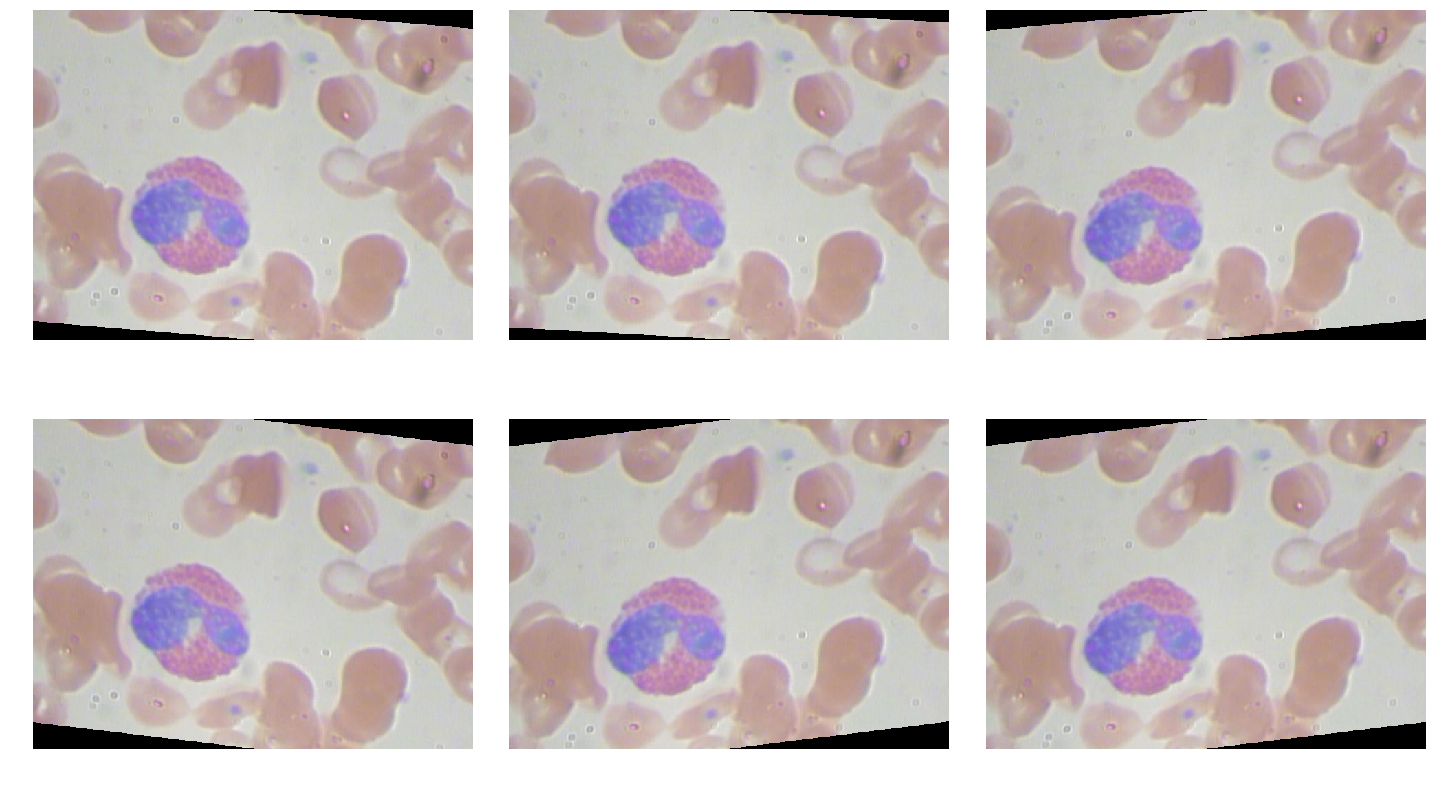

In [13]:
gen = ImageDataGenerator(zoom_range=0.0,shear_range=10,fill_mode = 'constant')
aimg = gen.flow(image,batch_size = 1)
aug_images = [next(aimg)[0].astype(np.uint8) for i in range(6)]
plots(aug_images, figsize=(20,12), rows=2)
plt.xlabel('Shear range')
plt.tight_layout()
plt.show()

## Flipping

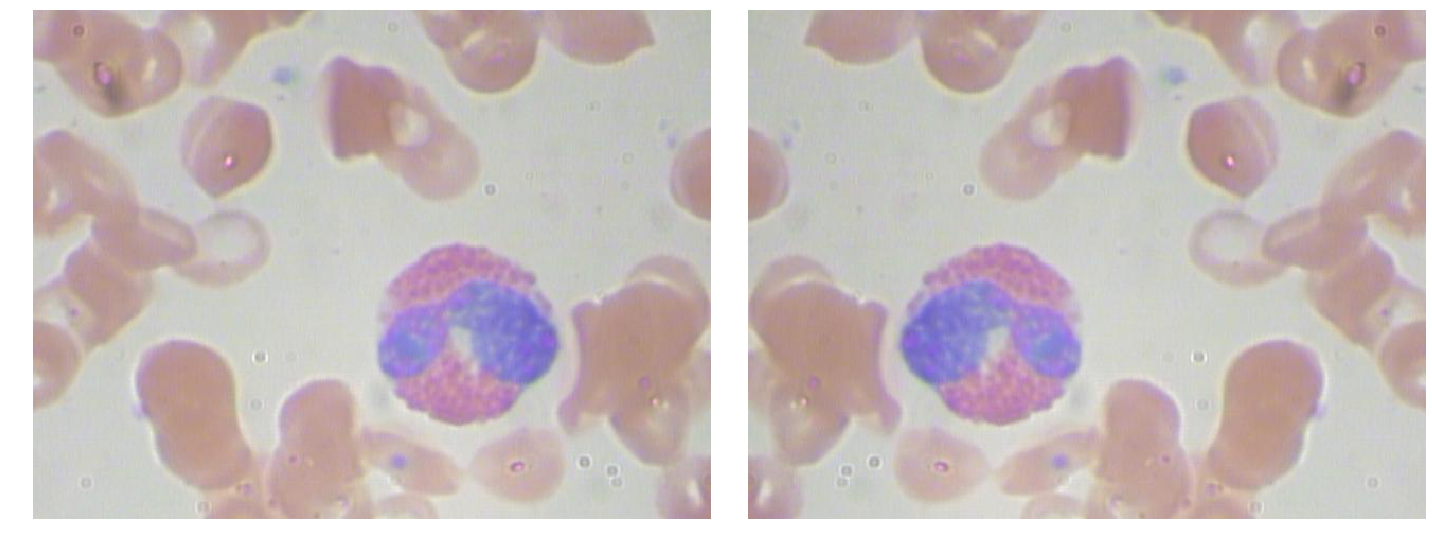

In [14]:
# horizontal_flip
gen = ImageDataGenerator(horizontal_flip=True,fill_mode = 'constant')
aimg = gen.flow(image,batch_size = 1)
aug_images = [next(aimg)[0].astype(np.uint8) for i in range(2)]
plots(aug_images, figsize=(20,10), rows=1)
plt.xlabel('Horizontal Filp')
plt.tight_layout()
plt.show()

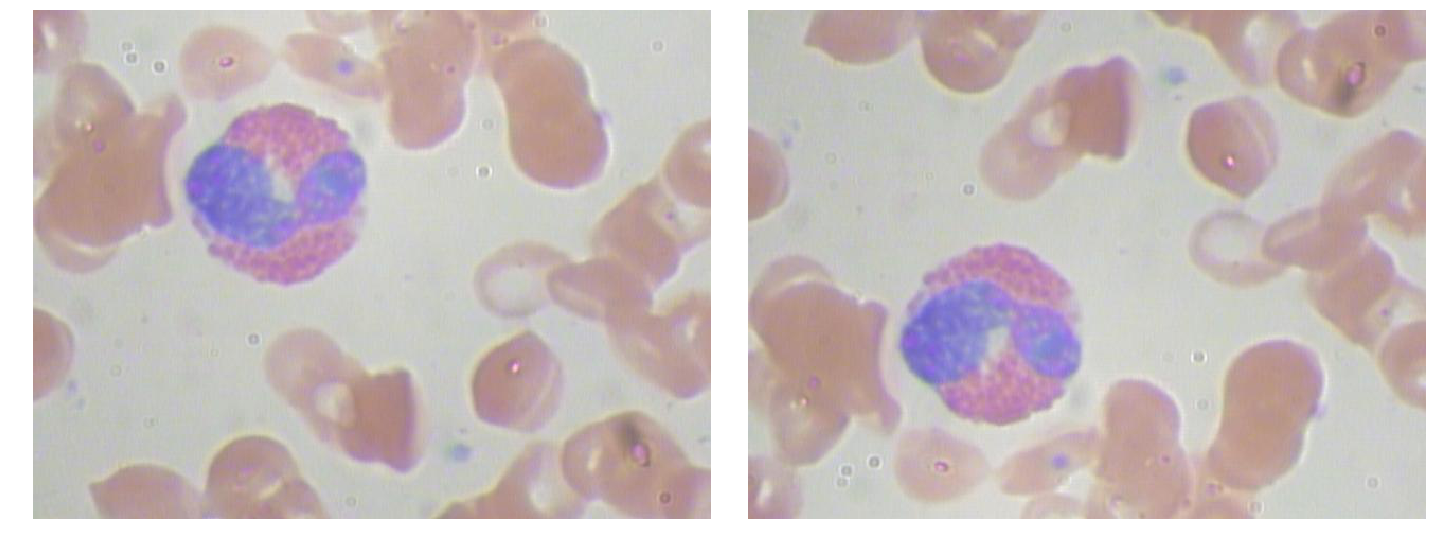

In [19]:
# vertical_flip
gen = ImageDataGenerator(vertical_flip=True,fill_mode = 'constant')
aimg = gen.flow(image,batch_size = 1)
aug_images = [next(aimg)[0].astype(np.uint8) for i in range(2)]
plots(aug_images, figsize=(20,10), rows=1)
plt.xlabel('Vertical Filp')
plt.tight_layout()
plt.show()

## Rescaling

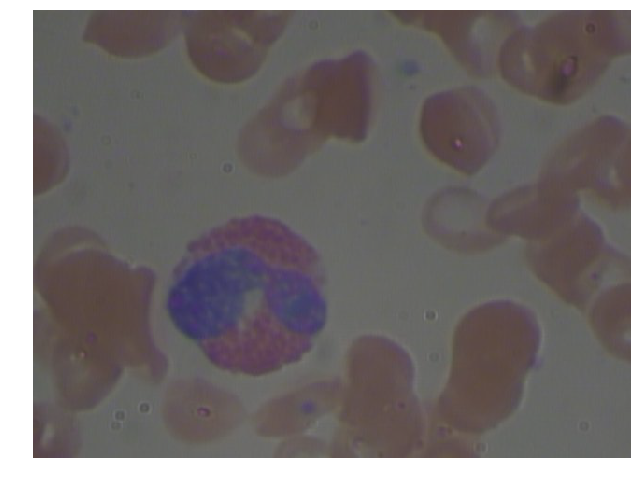

In [23]:
#rescale
gen = ImageDataGenerator(rescale=1./2)
aimg = gen.flow(image,batch_size = 1)
aug_images = [(next(aimg)[0]).astype(np.uint8) for i in range(1)]
plots(aug_images, figsize=(20,7), rows=1)
plt.xlabel('Rescaling')
plt.tight_layout()
plt.show()

## Augmentation preview

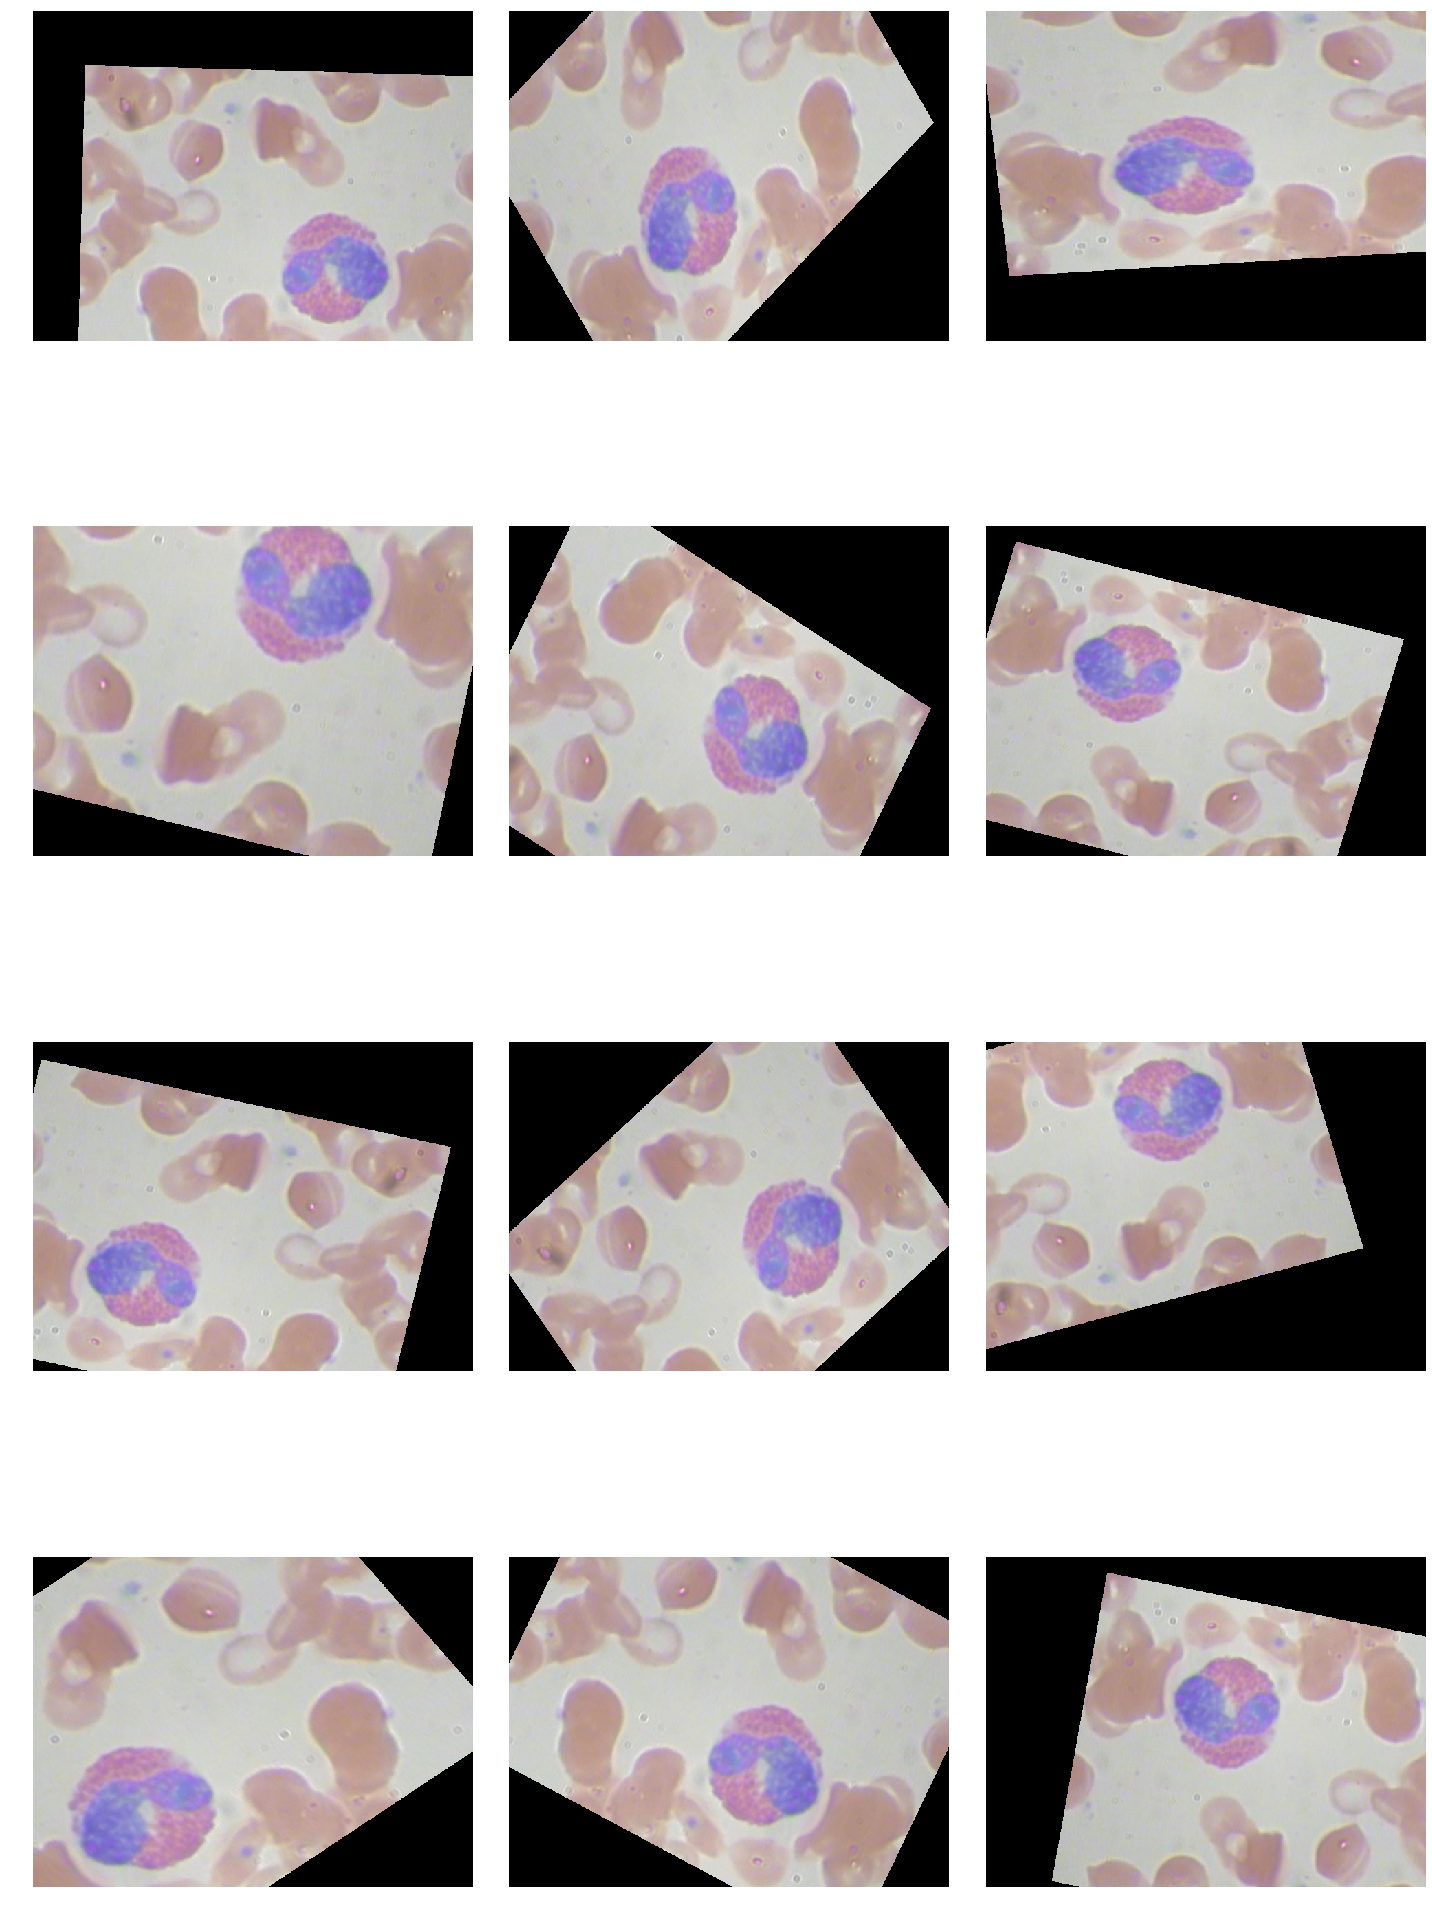

In [24]:
gen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True, vertical_flip = True,
        fill_mode='constant')

img = load_img('wbc_sample.jpg')  
x = img_to_array(img)  # this is a Numpy array with shape (3, width, height)
x = x.reshape((1,) + x.shape)

aimg = gen.flow(image,batch_size = 12)
aug_images = [next(aimg)[0].astype(np.uint8) for i in range(12)]
plots(aug_images, figsize=(20,30), rows=4)
plt.tight_layout()
plt.show()